# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total cities found: {len(cities)}")

Total cities found: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
import requests
import time
import pandas as pd
from api_keys import weather_api_key  

# URL base de la API de OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather"

# Lista para almacenar los datos del clima de cada ciudad
city_data = []

# Mensajes de inicio de recolección de datos
print("Beginning Data Retrieval")
print("-----------------------------")

# Contadores para el proceso de obtención de datos
record_count = 1
set_count = 1

# Itera sobre la lista de ciudades y realiza la solicitud de datos
for i, city in enumerate(cities):

    # Agrupar ciudades en conjuntos de 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Construye la URL de la API para cada ciudad
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Registro de la ciudad y el conjunto de datos
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    # Realiza la solicitud de datos
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Extrae los datos relevantes del JSON
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Agrega los datos de la ciudad a city_data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except:
        print("City not found. Skipping...")
        pass

    # Pausa para evitar límites de tasa de la API
    time.sleep(1)

# Indica que el proceso ha terminado
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | severo-yeniseyskiy
Processing Record 3 of Set 1 | bel ombre
Processing Record 4 of Set 1 | le vauclin
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | kostomuksha
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | minas de marcona
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | lyantor
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | kayangel
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | takamaka
City not found. Skipping...
Processing Record 18 of Set 1 | natal
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of

In [8]:
import pandas as pd

# Convierte los datos meteorológicos de las ciudades en un DataFrame de Pandas
city_data_df = pd.DataFrame(city_data)

# Muestra el conteo de registros para cada columna
city_data_df.count()


City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


In [10]:
import os
import pandas as pd

# Asegúrate de que city_data_df tiene datos
print(city_data_df.head())  # Esto debería mostrar una muestra de datos

# Crea la carpeta "output_data" en el directorio actual si no existe
output_path = "output_data"
os.makedirs(output_path, exist_ok=True)

# Exporta el DataFrame a un archivo CSV en la carpeta "output_data"
csv_path = os.path.join(output_path, "cities.csv")
city_data_df.to_csv(csv_path, index_label="City_ID")

# Verificación final
print(f"CSV saved at: {csv_path}")


                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          whitehorse  60.7161 -135.0538      0.01        79          75   
1  severo-yeniseyskiy  60.3725   93.0408     -7.97        88         100   
2           bel ombre  -4.6167   55.4167     26.91        83          40   
3          le vauclin  14.5452  -60.8388     26.03        89          75   
4           adamstown -25.0660 -130.1015     22.12        71         100   

   Wind Speed Country        Date  
0        5.14      CA  1731274604  
1        3.09      RU  1731274605  
2        2.57      SC  1731274606  
3        1.03      MQ  1731274608  
4        6.00      PN  1731274609  
CSV saved at: output_data\cities.csv


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

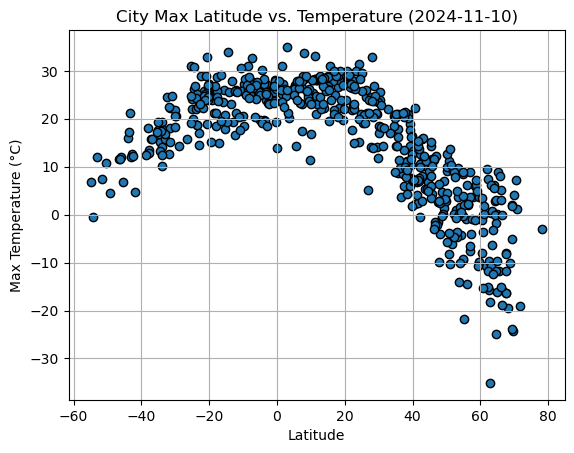

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime

# Fecha actual para incluir en el título
current_date = datetime.now().strftime("%Y-%m-%d")

# Crear el gráfico de dispersión para latitud vs. temperatura máxima
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporar propiedades adicionales del gráfico
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid()

# Guardar la figura
plt.savefig("output_data/Fig1.png")

# Mostrar el gráfico
plt.show()


#### Latitude Vs. Humidity

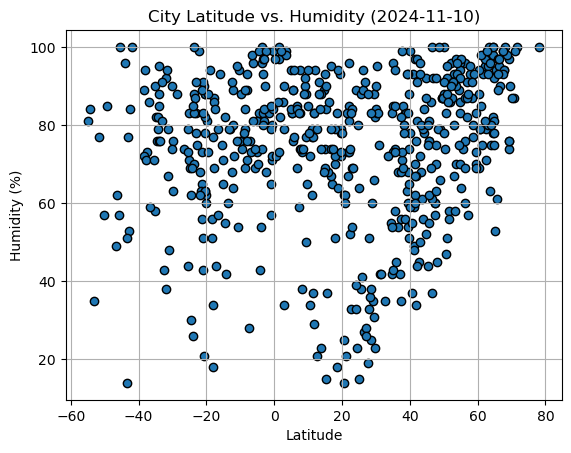

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

# Fecha actual para incluir en el título
current_date = datetime.now().strftime("%Y-%m-%d")

# Crear el gráfico de dispersión para latitud vs. humedad
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporar propiedades adicionales del gráfico
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Guardar la figura
plt.savefig("output_data/Fig2.png")

# Mostrar el gráfico
plt.show()


#### Latitude Vs. Cloudiness

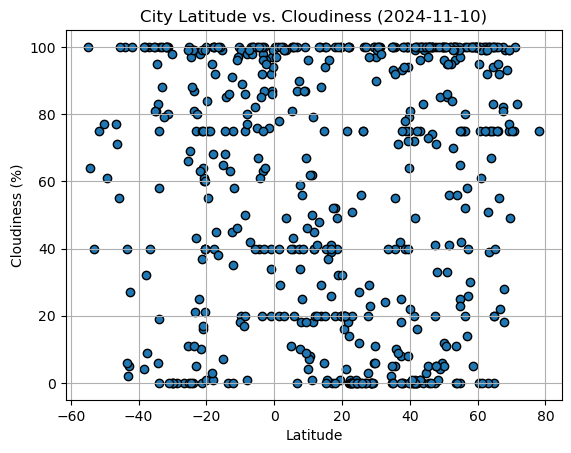

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime

# Fecha actual para incluir en el título
current_date = datetime.now().strftime("%Y-%m-%d")

# Crear el gráfico de dispersión para latitud vs. nubosidad
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporar propiedades adicionales del gráfico
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Guardar la figura
plt.savefig("output_data/Fig3.png")

# Mostrar el gráfico
plt.show()


#### Latitude vs. Wind Speed Plot

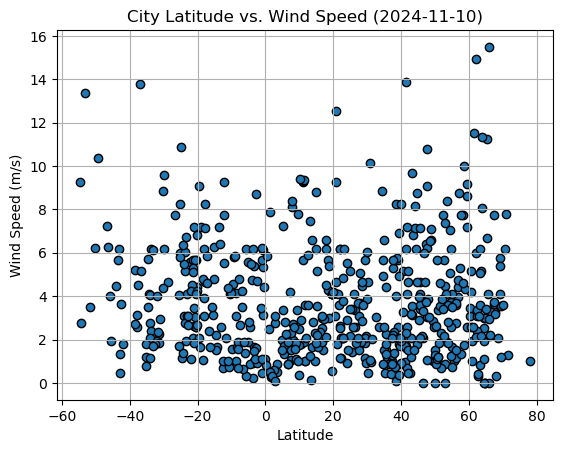

In [14]:
import matplotlib.pyplot as plt
from datetime import datetime

# Fecha actual para incluir en el título
current_date = datetime.now().strftime("%Y-%m-%d")

# Crear el gráfico de dispersión para latitud vs. velocidad del viento
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporar propiedades adicionales del gráfico
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Guardar la figura
plt.savefig("output_data/Fig4.png")

# Mostrar el gráfico
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


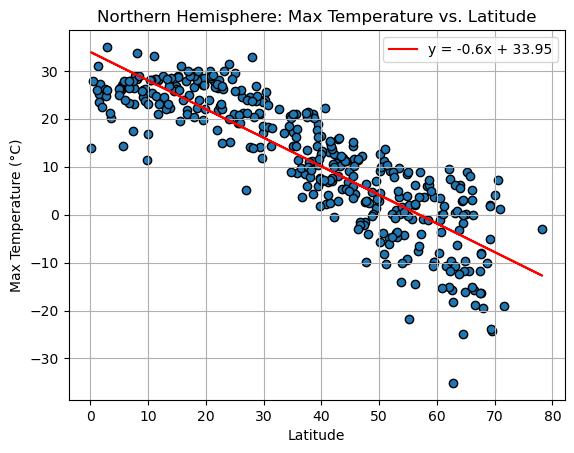

R^2 = 0.74


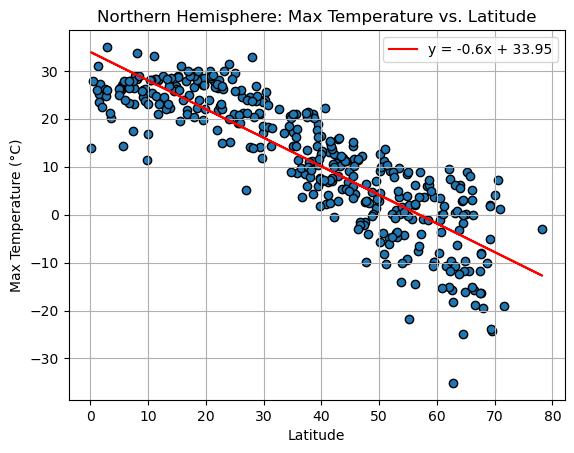

R^2 = 0.74


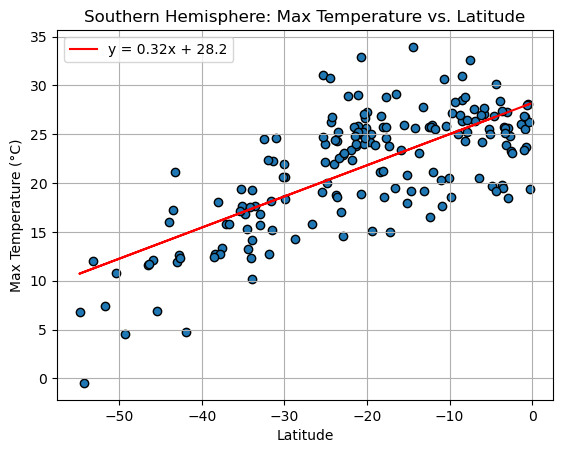

R^2 = 0.51


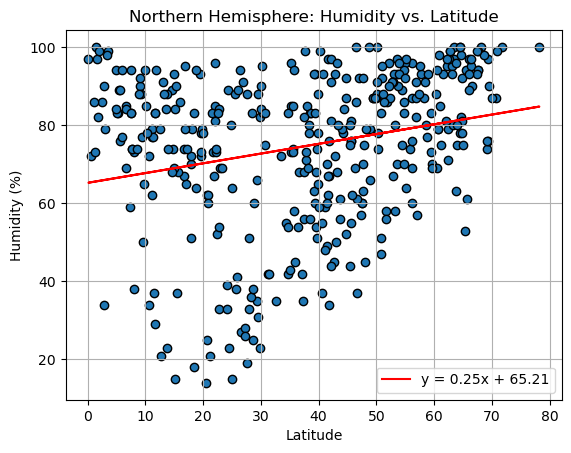

R^2 = 0.06


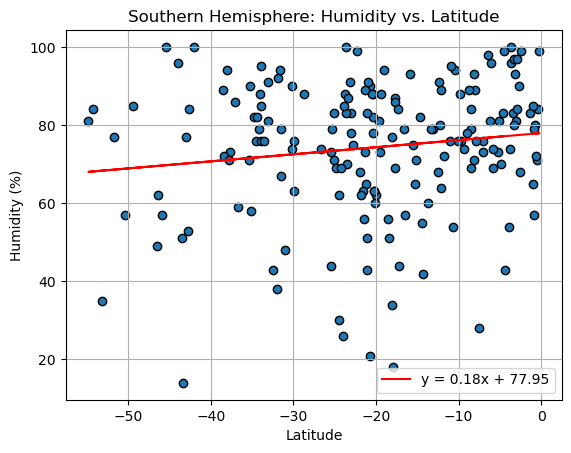

R^2 = 0.02


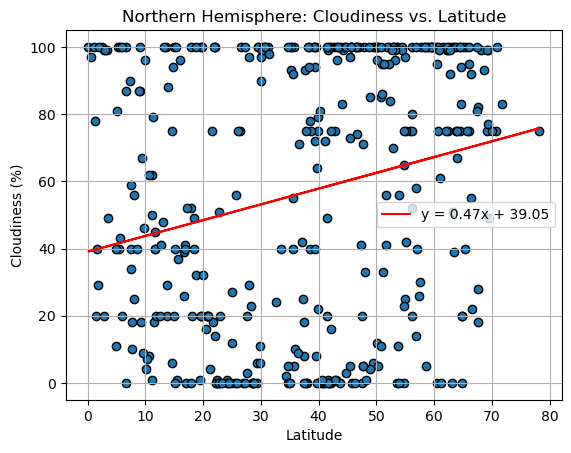

R^2 = 0.05


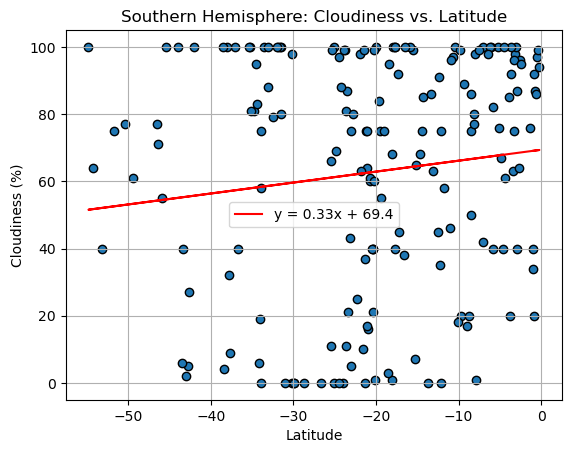

R^2 = 0.02


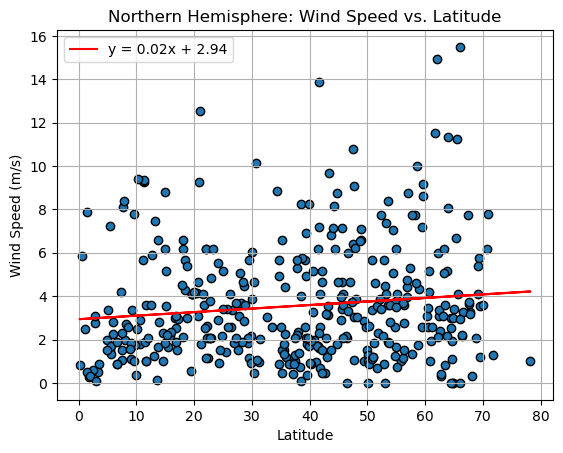

R^2 = 0.01


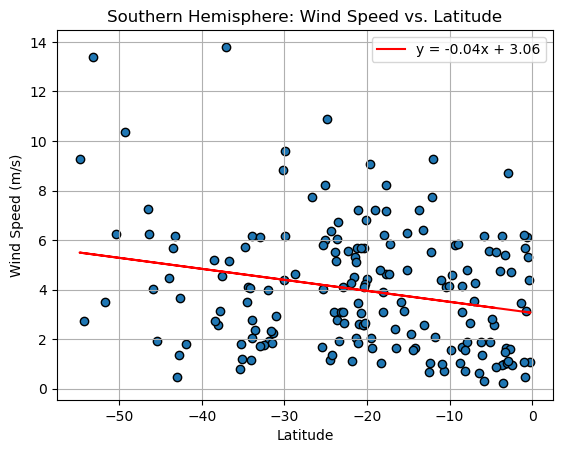

R^2 = 0.06


In [18]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    """
    Crea un gráfico de dispersión con una línea de regresión lineal.
    
    Parámetros:
    x_values (Series): Valores en el eje X.
    y_values (Series): Valores en el eje Y.
    title (str): Título del gráfico.
    xlabel (str): Etiqueta del eje X.
    ylabel (str): Etiqueta del eje Y.
    save_path (str): Ruta de archivo para guardar el gráfico.
    """
    # Calcular la regresión lineal
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Crear el gráfico de dispersión
    plt.scatter(x_values, y_values, edgecolor="black")
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()

    # Guardar la figura
    plt.savefig(save_path)
    
    # Mostrar el gráfico
    plt.show()

    # Mostrar el valor de R^2
    print(f"R^2 = {rvalue**2:.2f}")

# Ejemplo de uso de la función con datos de prueba
# Filtra los datos para el hemisferio norte y crea un gráfico de ejemplo
northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

# Llamar a la función con datos de ejemplo
plot_linear_regression(
    x_values=northern_hemisphere["Lat"],
    y_values=northern_hemisphere["Max Temp"],
    title="Northern Hemisphere: Max Temperature vs. Latitude",
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    save_path="output_data/Fig5.png"
)

# Filtra los datos para los hemisferios norte y sur
northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df[city_data_df["Lat"] < 0]

# 1. Northern Hemisphere: Temperature vs. Latitude
plot_linear_regression(
    x_values=northern_hemisphere["Lat"],
    y_values=northern_hemisphere["Max Temp"],
    title="Northern Hemisphere: Max Temperature vs. Latitude",
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    save_path="output_data/NH_Temperature_vs_Latitude.png"
)

# 2. Southern Hemisphere: Temperature vs. Latitude
plot_linear_regression(
    x_values=southern_hemisphere["Lat"],
    y_values=southern_hemisphere["Max Temp"],
    title="Southern Hemisphere: Max Temperature vs. Latitude",
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    save_path="output_data/SH_Temperature_vs_Latitude.png"
)

# 3. Northern Hemisphere: Humidity vs. Latitude
plot_linear_regression(
    x_values=northern_hemisphere["Lat"],
    y_values=northern_hemisphere["Humidity"],
    title="Northern Hemisphere: Humidity vs. Latitude",
    xlabel="Latitude",
    ylabel="Humidity (%)",
    save_path="output_data/NH_Humidity_vs_Latitude.png"
)

# 4. Southern Hemisphere: Humidity vs. Latitude
plot_linear_regression(
    x_values=southern_hemisphere["Lat"],
    y_values=southern_hemisphere["Humidity"],
    title="Southern Hemisphere: Humidity vs. Latitude",
    xlabel="Latitude",
    ylabel="Humidity (%)",
    save_path="output_data/SH_Humidity_vs_Latitude.png"
)

# 5. Northern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(
    x_values=northern_hemisphere["Lat"],
    y_values=northern_hemisphere["Cloudiness"],
    title="Northern Hemisphere: Cloudiness vs. Latitude",
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    save_path="output_data/NH_Cloudiness_vs_Latitude.png"
)

# 6. Southern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(
    x_values=southern_hemisphere["Lat"],
    y_values=southern_hemisphere["Cloudiness"],
    title="Southern Hemisphere: Cloudiness vs. Latitude",
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    save_path="output_data/SH_Cloudiness_vs_Latitude.png"
)

# 7. Northern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(
    x_values=northern_hemisphere["Lat"],
    y_values=northern_hemisphere["Wind Speed"],
    title="Northern Hemisphere: Wind Speed vs. Latitude",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    save_path="output_data/NH_WindSpeed_vs_Latitude.png"
)

# 8. Southern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(
    x_values=southern_hemisphere["Lat"],
    y_values=southern_hemisphere["Wind Speed"],
    title="Southern Hemisphere: Wind Speed vs. Latitude",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    save_path="output_data/SH_WindSpeed_vs_Latitude.png"
)


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,0.01,79,75,5.14,CA,1731274604
1,severo-yeniseyskiy,60.3725,93.0408,-7.97,88,100,3.09,RU,1731274605
3,le vauclin,14.5452,-60.8388,26.03,89,75,1.03,MQ,1731274608
5,bethel,41.3712,-73.4140,13.05,49,20,6.17,US,1731274610
6,kostomuksha,64.5710,30.5767,-1.73,82,83,1.93,RU,1731274611


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,0.01,79,75,5.14,CA,1731274604
1,severo-yeniseyskiy,60.3725,93.0408,-7.97,88,100,3.09,RU,1731274605
3,le vauclin,14.5452,-60.8388,26.03,89,75,1.03,MQ,1731274608
5,bethel,41.3712,-73.4140,13.05,49,20,6.17,US,1731274610
6,kostomuksha,64.5710,30.5767,-1.73,82,83,1.93,RU,1731274611
